image = https://www.cse.iitb.ac.in/~br/webpage/covid19/u5india/images/uk-vs-sweden.jpg

In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as m_dates
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('owid-covid-data.csv')
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365374 entries, 0 to 365373
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    365374 non-null  object 
 1   continent                                   347995 non-null  object 
 2   location                                    365374 non-null  object 
 3   date                                        365374 non-null  object 
 4   total_cases                                 327216 non-null  float64
 5   new_cases                                   355673 non-null  float64
 6   new_cases_smoothed                          354414 non-null  float64
 7   total_deaths                                305512 non-null  float64
 8   new_deaths                                  355720 non-null  float64
 9   new_deaths_smoothed                         354490 non-null  float64
 

In [4]:
data.shape

(365374, 67)

In [45]:
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values('date')

In [46]:
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
204617,MEX,North America,Mexico,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,21.400,87.847,1.380,75.05,0.779,1.275041e+08,NaN,NaN,NaN,NaN
13023,ARG,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,27.700,NaN,5.000,76.67,0.845,4.551032e+07,NaN,NaN,NaN,NaN
204618,MEX,North America,Mexico,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,21.400,87.847,1.380,75.05,0.779,1.275041e+08,NaN,NaN,NaN,NaN
13024,ARG,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,27.700,NaN,5.000,76.67,0.845,4.551032e+07,NaN,NaN,NaN,NaN
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.500,64.83,0.511,4.112877e+07,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49206,BGR,Europe,Bulgaria,2023-12-21,NaN,NaN,NaN,NaN,NaN,NaN,...,44.400,NaN,7.454,75.05,0.816,6.781955e+06,NaN,NaN,NaN,NaN
140288,OWID_HIC,NaN,High income,2023-12-21,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.250515e+09,NaN,NaN,NaN,NaN
315071,SWE,Europe,Sweden,2023-12-21,NaN,NaN,NaN,NaN,NaN,NaN,...,18.900,NaN,2.220,82.80,0.945,1.054935e+07,NaN,NaN,NaN,NaN
361032,OWID_WRL,NaN,World,2023-12-21,NaN,NaN,NaN,NaN,NaN,NaN,...,34.635,60.130,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN


In [47]:
data['location'].unique()

array(['Mexico', 'Argentina', 'Afghanistan', 'Saudi Arabia', 'Cambodia',
       'Senegal', 'Burundi', 'Serbia', 'Burkina Faso', 'Seychelles',
       'Sierra Leone', 'Bulgaria', 'Singapore', 'Brunei', 'Slovakia',
       'Cameroon', 'British Virgin Islands', 'Slovenia',
       'Solomon Islands', 'Brazil', 'Somalia', 'Botswana', 'South Africa',
       'South America', 'Bosnia and Herzegovina', 'South Korea',
       'Bonaire Sint Eustatius and Saba', 'South Sudan',
       'Sint Maarten (Dutch part)', 'Sao Tome and Principe', 'San Marino',
       'Canada', 'Pitcairn', 'Poland', 'Cook Islands', 'Portugal',
       'Congo', 'Puerto Rico', 'Qatar', 'Comoros', 'Reunion', 'Colombia',
       'Romania', 'Russia', 'China', 'Rwanda', 'Saint Barthelemy',
       'Chile', 'Saint Helena', 'Chad', 'Saint Kitts and Nevis',
       'Saint Lucia', 'Central African Republic',
       'Saint Martin (French part)', 'Cayman Islands',
       'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines',
       'C

In [48]:
data_UK = data[data['location'] == 'United Kingdom']
data_Sweden = data[data['location'] == 'Sweden']

In [49]:
data_UK

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
342466,GBR,Europe,United Kingdom,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,24.7,NaN,2.54,81.32,0.932,67508936.0,NaN,NaN,NaN,NaN
342467,GBR,Europe,United Kingdom,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,24.7,NaN,2.54,81.32,0.932,67508936.0,NaN,NaN,NaN,NaN
342468,GBR,Europe,United Kingdom,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,24.7,NaN,2.54,81.32,0.932,67508936.0,71.9,0.53,0.53,1.072183
342469,GBR,Europe,United Kingdom,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,24.7,NaN,2.54,81.32,0.932,67508936.0,NaN,NaN,NaN,NaN
342470,GBR,Europe,United Kingdom,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,24.7,NaN,2.54,81.32,0.932,67508936.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343908,GBR,Europe,United Kingdom,2023-12-15,24812582.0,0.0,0.0,232112.0,0.0,0.0,...,24.7,NaN,2.54,81.32,0.932,67508936.0,NaN,NaN,NaN,NaN
343909,GBR,Europe,United Kingdom,2023-12-16,24812582.0,0.0,0.0,232112.0,0.0,0.0,...,24.7,NaN,2.54,81.32,0.932,67508936.0,NaN,NaN,NaN,NaN
343910,GBR,Europe,United Kingdom,2023-12-17,24812582.0,0.0,0.0,232112.0,0.0,0.0,...,24.7,NaN,2.54,81.32,0.932,67508936.0,NaN,NaN,NaN,NaN
343911,GBR,Europe,United Kingdom,2023-12-18,24812582.0,0.0,0.0,232112.0,0.0,0.0,...,24.7,NaN,2.54,81.32,0.932,67508936.0,NaN,NaN,NaN,NaN


In [50]:
data_UK_time = data_UK[(data_UK['date'] >= '2020-03-01') & (data_UK['date'] <= '2021-05-10')].reset_index(drop=True)
data_Sweden_time = data_Sweden[(data_Sweden['date'] >= '2020-03-01') & (data_Sweden['date'] <= '2021-05-10')].reset_index(drop=True)

In [51]:
data_UK_time

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,GBR,Europe,United Kingdom,2020-03-01,68.0,12.0,4.714,3.0,0.0,0.143,...,24.7,NaN,2.54,81.32,0.932,67508936.0,-5170.90,-4.11,-3.22,-77.10916
1,GBR,Europe,United Kingdom,2020-03-02,72.0,4.0,5.286,3.0,0.0,0.000,...,24.7,NaN,2.54,81.32,0.932,67508936.0,NaN,NaN,NaN,NaN
2,GBR,Europe,United Kingdom,2020-03-03,92.0,20.0,7.286,3.0,0.0,0.000,...,24.7,NaN,2.54,81.32,0.932,67508936.0,NaN,NaN,NaN,NaN
3,GBR,Europe,United Kingdom,2020-03-04,133.0,41.0,12.857,4.0,1.0,0.143,...,24.7,NaN,2.54,81.32,0.932,67508936.0,NaN,NaN,NaN,NaN
4,GBR,Europe,United Kingdom,2020-03-05,191.0,58.0,20.714,4.0,0.0,0.143,...,24.7,NaN,2.54,81.32,0.932,67508936.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,GBR,Europe,United Kingdom,2021-05-06,4509406.0,2553.0,2020.714,153694.0,15.0,17.286,...,24.7,NaN,2.54,81.32,0.932,67508936.0,NaN,NaN,NaN,NaN
432,GBR,Europe,United Kingdom,2021-05-07,4511975.0,2569.0,2030.714,153716.0,22.0,17.429,...,24.7,NaN,2.54,81.32,0.932,67508936.0,NaN,NaN,NaN,NaN
433,GBR,Europe,United Kingdom,2021-05-08,4514301.0,2326.0,2044.429,153733.0,17.0,17.429,...,24.7,NaN,2.54,81.32,0.932,67508936.0,NaN,NaN,NaN,NaN
434,GBR,Europe,United Kingdom,2021-05-09,4516283.0,1982.0,2066.857,153751.0,18.0,17.714,...,24.7,NaN,2.54,81.32,0.932,67508936.0,103313.51,12.13,-19.20,1535.55160


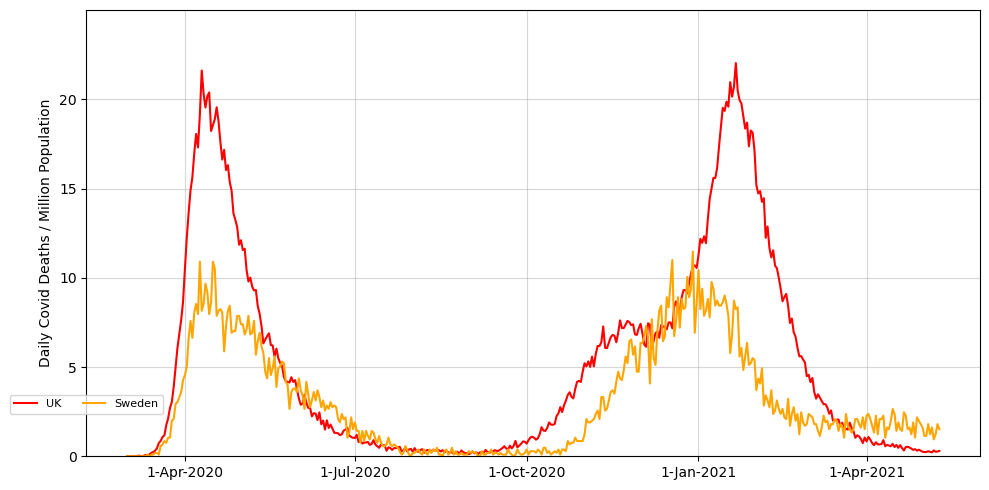

In [74]:
plt.figure(figsize=(10,5))
plt.plot(data_UK_time['date'], data_UK_time['new_deaths_per_million'],label='UK', color ='red')
plt.plot(data_Sweden_time['date'], data_Sweden_time['new_deaths_per_million'],label='Sweden', color = 'orange')
plt.legend(loc='upper center', bbox_to_anchor=(0, 0.15), ncol = 3, fontsize="8")
myfmt=m_dates.DateFormatter("1-%b-20%y")
plt.gca().xaxis.set_major_formatter(myfmt)
plt.gca().xaxis.set_major_locator(m_dates.MonthLocator(interval=3))
plt.grid(True, alpha = 0.5)
plt.tight_layout()
plt.ylim([0,25])
plt.ylabel('Daily Covid Deaths / Million Population')
plt.yticks([0,5,10,15,20])
plt.show()